# CSIC5011 Final Project

## 6 Transition Paths of Karate Club Network

In [2]:
import scipy.io
import numpy as np
#import torch
import math
from sklearn.cluster import KMeans
from scipy import linalg  
import networkx as nx 
import matplotlib.pyplot as plt 
karate = scipy.io.loadmat('karate.mat')
from sklearn.metrics import accuracy_score

**Loading Karate Dataset**

The story behind the network is this: the coach would like to raise
the instruction fee while the president does not allow this; the conficts finally result in a fission of
the club - the coach leaves the club with his funs and sets up his own club marked in red, and the
blue nodes remain in the old club with the president.

In [3]:
A=karate['A']
print('adjacency matrix',A)
c0 = karate['c0']
l = []
node_labels = {}
k = 0
for i in c0:
    l.append(i.item())
    if i.item() in node_labels.keys():
        node_labels[i.item()].append(k)
    else:
        node_labels[i.item()] = [k]
    k +=1
print('label',node_labels)


adjacency matrix [[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
label {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21], 1: [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]}


In [4]:
edges=[]
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i,j]>0:
            edges.append((i+1, j+1))
G = nx.Graph() 
G.add_edges_from(edges) 

D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


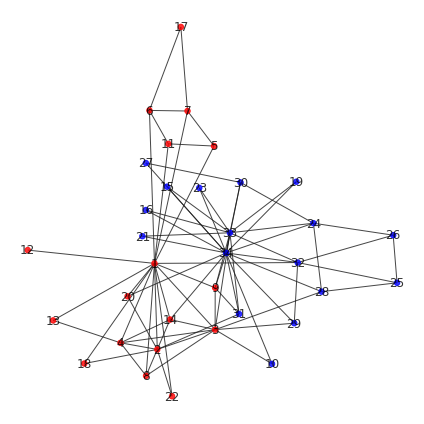

In [5]:
plt.figure(figsize =(6, 6)) 

node_color = [] 
for v in G:
    if l[v-1] == 0 :
        node_color.append('red')
    elif l[v-1] == 1:
        node_color.append('blue')
  
nx.draw_networkx(G, node_size = 30, node_color = node_color, alpha = 0.8, with_labels = True,  edge_color ='.1') 
  
plt.axis('off') 
plt.tight_layout();

### Part A. Spectral Clustering 

### Version1. Sklearn implementation

In [6]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize",random_state=0).fit(A)
y_pre = clustering.labels_
print(y_pre)
acc = accuracy_score(l,y_pre)
print(acc)



D:\anaconda\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
0.9705882352941176


D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


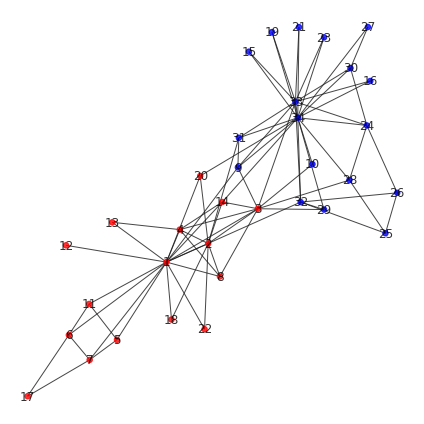

In [7]:
plt.figure(figsize =(6, 6)) 

node_color = [] 
for v in G:
    if y_pre[v-1] == 0:
        node_color.append('red')
    elif y_pre[v-1] == 1:
        node_color.append('blue')
  
nx.draw_networkx(G, node_size = 30, node_color = node_color, alpha = 0.8, with_labels = True,  edge_color ='.1') 
  
plt.axis('off') 
plt.tight_layout();

### Version2. Our implementation

### Normalized spectral clustering according to Shi and Malik
Input: Adjacency matrix $A\in R^{n\times n}$, number k of clusters to construct.<br>

- Compute the unnormalized Laplacian L.<br>
- Compute the first $k$ generalized eigenvaectors $u_1,...,u_k$ of the generalized eigenproblem $Lu = \lambda Du$.<br>
- Let $U\in R^{n\times k}$ be the matrix containing the vectors $u_1,...,u_k$ as columns.<br>
- For $i=1,...,n,$ let $y_i\in R^k$ be the vector corresponding to the $i-th$ row of $U$.<br>
- Cluster the points $(y_i)_{i=1,...,n}$ in $R^k$ with the $k-means$ algorithm into clusters $C_1,...,C_k$.<br>

Output: Clusters $A_1,...,A_k$ with $A_i=\{j|y_j\in C_i\}$.

In [8]:
rowsum = np.array(A.sum(1))
D = np.diag(rowsum.flatten())
L = D-A
r_inv = np.power(rowsum,-1/2).flatten()
r_inv[np.isinf(r_inv)] = 0.
r_mat_inv = np.diag(r_inv)
L_norm = np.dot(r_mat_inv,L)
L_norm = np.dot(L_norm,r_mat_inv)

In [9]:
eigvals, eigvecs = linalg.eig(L)
eigvals = eigvals.real
eigvecs = eigvecs.real
index_array = np.argsort(-eigvals)
v = eigvecs[:, index_array]
spectral_embeddings = v[:,:2]

kmeans = KMeans(n_clusters=2, random_state=1231)
rows_norm = np.linalg.norm(eigvecs, axis=1, ord=2)
Y = (spectral_embeddings.T / rows_norm).T
labels = kmeans.fit(Y).labels_
print(labels)
acc = accuracy_score(l,labels)
print(acc)

[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
0.9705882352941176


D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


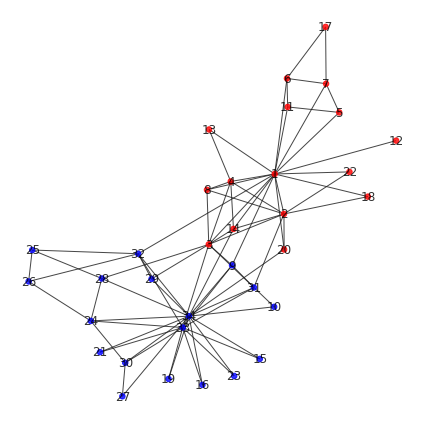

In [10]:
plt.figure(figsize =(6, 6)) 

node_color = [] 
for v in G:
    if labels[v-1] == 0:
        node_color.append('red')
    elif labels[v-1] == 1:
        node_color.append('blue')
  
nx.draw_networkx(G, node_size = 30, node_color = node_color, alpha = 0.8, with_labels = True,  edge_color ='.1') 
  
plt.axis('off') 
plt.tight_layout();

**Normalized spectral clustering according to Ng, Jordan, and Weiss**

Input: Adjacency matrix $A\in R^{n\times n}$, number k of clusters to construct.<br>

- Compute the normalized Laplacian $L_{sym}$.<br>
- Compute the first $k$ generalized eigenvaectors $u_1,...,u_k$ of $L_{sym}$.<br>
- Let $U\in R^{n\times k}$ be the matrix containing the vectors $u_1,...,u_k$ as columns.<br>
- From the matrix $T\in R^{n\times k}$ from $U$ by normalizing the rows to norm 1, that is set $t_{ij}=\frac {u_{ij}}{(\sum _k u_{ik}^2)^{\frac 12}}$.<br>
- For $i=1,...,n,$ let $y_i\in R^k$ be the vector corresponding to the $i-th$ row of $T$.<br>
- Cluster the points $(y_i)_{i=1,...,n}$ in $R^k$ with the $k-means$ algorithm into clusters $C_1,...,C_k$.<br>

Output: Clusters $A_1,...,A_k$ with $A_i=\{j|y_j\in C_i\}$.

In [11]:
eigvals, eigvecs = linalg.eig(L_norm)
eigvals = eigvals.real
eigvecs = eigvecs.real
index_array = np.argsort(-eigvals)
v = eigvecs[:, index_array]
d = np.dot(v,v.T)
d = d.diagonal()
d = np.power(d,-1)
d = np.diag(d)
v = np.dot(d,v.T)
v = v.T
spectral_embeddings = v[:,:2]

kmeans = KMeans(n_clusters=2, random_state=1231)
rows_norm = np.linalg.norm(eigvecs, axis=1, ord=2)
Y = (spectral_embeddings.T / rows_norm).T
labels = kmeans.fit(Y).labels_
print(labels)
acc = accuracy_score(l,labels)
print(acc)

[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
0.9411764705882353


D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


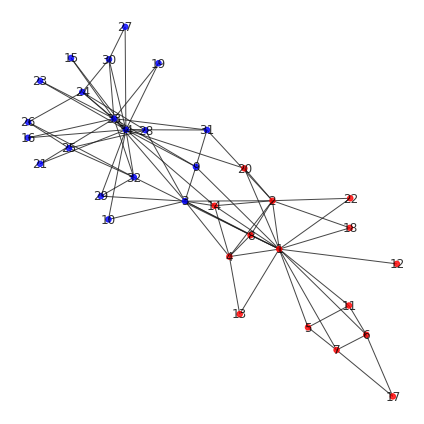

In [12]:
plt.figure(figsize =(6, 6)) 

node_color = [] 
for v in G:
    if labels[v-1] == 0:
        node_color.append('red')
    elif labels[v-1] == 1:
        node_color.append('blue')
  
nx.draw_networkx(G, node_size = 30, node_color = node_color, alpha = 0.8, with_labels = True,  edge_color ='.1') 
  
plt.axis('off') 
plt.tight_layout();

## Part B. 
Perform the following experiment with the transition path analysis.

In this part, we will
* Divide the nodes into two factions, one containing the source and the other containing sink
* Quantify the strengths/weaknesses of the edges in the network
* Find key nodes through which the information is likely to pass from one faction to the other
* Investigate how information flows from source to sink

In [13]:
# load mat
import scipy.io
karate = scipy.io.loadmat('karate.mat')
A=karate['A']
print(A)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


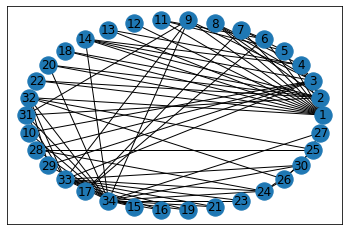

In [17]:
# visualize the social network represented by A
import networkx as nx 
import matplotlib.pyplot as plt 
#inline

N = A.shape[0]
edges = [] 
for i in range(N):
    for j in range(N):
        if A[i,j]==1:
            edges.append((i+1,j+1))
        
GA = nx.Graph() 
GA.add_edges_from(edges) 
nx.draw_networkx(GA, pos = nx.circular_layout(GA) ,with_label = True) 

Here $A$ is a $34 \times 34$ square matrix of ones and zeros which is the representation of the social network. In this form, each individual is represented by a row and column in the matrix. For each entry in $A$, 1 is assigned to it when an edge drawn between the points corresponding to the roe and column. 0 is assigned if otherwise.

1.Define a Markov chain according to the network structure, such that from each node a random walker will jump to its neighbors with equal probability. $P=D^{-1}A, D=diag(d_i), d_i=\sum_j A_{ij}.$

In [18]:
import numpy as np
D = np.sum(A, 1)
N = len(D)
print(N)
P = np.diag(1./D).dot(A)

34


In [19]:
print(P)

[[0.         0.0625     0.0625     ... 0.0625     0.         0.        ]
 [0.11111111 0.         0.11111111 ... 0.         0.         0.        ]
 [0.1        0.1        0.         ... 0.         0.1        0.        ]
 ...
 [0.16666667 0.         0.         ... 0.         0.16666667 0.16666667]
 [0.         0.         0.08333333 ... 0.08333333 0.         0.08333333]
 [0.         0.         0.         ... 0.05882353 0.05882353 0.        ]]


2.Compute its stationary distribution $\pi(i) \sim d_i.$

A stationary distribution of a Markov chain is a probability distribution that remains unchanged in the Markov chain as time progresses. Typically, it is represented as a column vector $v$ whose entries are probabilities summing to 1, and given transition matrix $\textbf{P}$, it satisfies
$$ \textbf{P}^{T} v=v.$$
In other words, $v$ is the eigenvalue of $ \textbf{P}^{T}$ corresponding to 1.

We can see $\textbf{P}^{T}$ has 1 as its eigenvalue. $\textbf{P}^{T}$ is symmetric so its eigenvalues are real.

In [20]:
evalue, evector = np.linalg.eig(P.T)
print(evalue.real)

[ 1.00000000e+00  8.67727671e-01  7.12951015e-01  6.12686767e-01
 -7.14611347e-01 -6.11909588e-01 -5.69506603e-01 -4.97030113e-01
 -4.48579382e-01 -4.16915851e-01 -3.51778259e-01 -3.93104541e-01
 -2.68023547e-01 -1.59299956e-01 -1.05380839e-01  3.87769460e-01
  3.51007053e-01  2.92791798e-01  2.60042011e-01  2.29089383e-01
  1.77057148e-01  1.35167055e-01  9.31839984e-02 -5.83333333e-01
 -1.13145747e-16 -5.09029801e-17 -5.09029801e-17  4.45200809e-17
  3.32761081e-17  2.07397572e-18  2.07397572e-18 -7.31619875e-18
 -7.31619875e-18 -2.18951836e-17]


In [21]:
#eigs finds complex eigenvalues and eigenvectors, we want the real part.
stationary = evector[:,0]/ np.sign(evector[0,0])
stationary = stationary.real
stationary = stationary/np.sum(stationary)
print(stationary)

[0.1025641  0.05769231 0.06410256 0.03846154 0.01923077 0.02564103
 0.02564103 0.02564103 0.03205128 0.01282051 0.01923077 0.00641026
 0.01282051 0.03205128 0.01282051 0.01282051 0.01282051 0.01282051
 0.01282051 0.01923077 0.01282051 0.01282051 0.01282051 0.03205128
 0.01923077 0.01923077 0.01282051 0.02564103 0.01923077 0.02564103
 0.02564103 0.03846154 0.07692308 0.10897436]


In [22]:
# check sum of entries is 1
print(np.sum(stationary))
#check pi =pi P
print(P.T.dot(stationary)-stationary)

1.0
[-3.05311332e-16 -6.93889390e-17  5.55111512e-17  4.16333634e-17
  3.46944695e-18 -3.12250226e-17 -1.73472348e-17  3.81639165e-17
  0.00000000e+00 -1.21430643e-17 -1.04083409e-17 -1.73472348e-18
  5.20417043e-18 -3.46944695e-17 -6.93889390e-18 -6.93889390e-18
  0.00000000e+00  1.73472348e-18 -6.93889390e-18  1.73472348e-17
 -6.93889390e-18  5.20417043e-18 -3.46944695e-18 -2.77555756e-17
 -1.38777878e-17  5.55111512e-17  0.00000000e+00  3.81639165e-17
  3.46944695e-17  1.73472348e-17 -1.04083409e-17 -1.38777878e-17
  1.11022302e-16  1.11022302e-16]


3.Define the source set $V_0=\{ 1\}$ and the target set $V_1=\{ 34\}$, compute the committor function 
$$ q(x) = Prob(trajectory\ \ strating \ \  from \ \  x \ \ hitting \ \ V_1 \ \ before\ \  V_0)$$
by solving the following Dirichlet boundary problem
$$ (Lq)(x)=0, x \in V_{u} := V-\{1,34 \}, q(1)=0, q(34)=1. $$
Find those edges which contains one node $q(x) \leq 0.5$ and the other node $q(x) \geq 0.5.$ Such edge set defines a cut of the graph.

The generator $L$ should satisfy:
* The elements on the main diagonal are all strictly negative.
* The elements off the main diagonal are non-negative.
* Each row sums to zero.

In [23]:
# generator of transition matrix P
L=P-np.eye(N)

# define the committor function q
q = np.zeros(N)
q[N-1]=1
# solve the Dirchelet Boundary problem
q[1:N-1]=np.linalg.solve(L[1:N-1,1:N-1], -L[1:N-1,N-1])

#print the committor function
print(q)

[0.         0.32220708 0.4921486  0.27342886 0.         0.
 0.         0.27194614 0.59652396 0.7460743  0.         0.
 0.13671443 0.41755691 0.90431537 0.90431537 0.         0.16110354
 0.90431537 0.44073569 0.90431537 0.16110354 0.90431537 0.84409453
 0.72588972 0.74553005 0.95038933 0.76553321 0.71958483 0.90077865
 0.68184045 0.66660589 0.80863075 1.        ]


In [24]:
# devide nodes according to the committor function
V0 = [i for i, val in enumerate(q <= 0.5) if val]
V1 = [i for i, val in enumerate(q >= 0.5) if val]
print(V0+np.ones(len(V0),dtype=np.int),'\n',
      V1+np.ones(len(V1),dtype=np.int))

[ 1  2  3  4  5  6  7  8 11 12 13 14 17 18 20 22] 
 [ 9 10 15 16 19 21 23 24 25 26 27 28 29 30 31 32 33 34]


In [25]:
# find edges which connect nodes between V0 and V1
# such edge set defines a cut of the graph
Edge_set=np.zeros((N,N))
for i in range(N):
    if i in V0:
        for j in range(i,N):
            if j in V1 and A[i,j] ==1:
                Edge_set[i,j]=1           
            
Edge_set = Edge_set+Edge_set.T

In [26]:
print(Edge_set)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


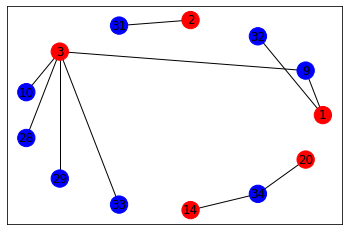

In [27]:
# visualize the cut of graph
GE = nx.Graph() 
edgesE = [] 
for i in range(N):
    for j in range(N):
        if Edge_set[i,j]==1:
            edgesE.append((i+1,j+1))
        
GE.add_edges_from(edgesE)

node_colorE = [] 
for v in GE:
    if v-1 in V0:
        node_colorE.append('red')
    elif v-1 in V1:
        node_colorE.append('blue')
        
nx.draw_networkx(GE, pos = nx.circular_layout(GE),
                 node_color = node_colorE ,with_label = True) 

The edges connecting nodes of one faction to nodes of the other are called cut.

4.Compute the effective flux on each edge $(x,y)$ by
$$ J^{+}(x,y)= \max(J(x,y)-J(y,x), 0), $$
where
$$ J(x,y) = \begin{cases}
            \pi(x)(1-q(x))P_{xy} q(y), &  x \neq y; \\
            0 , & \text{otherwise.}
        \end{cases} $$

In [28]:
X = np.diag(stationary*(1-q))
Y = np.diag(q)
J = X.dot(P)
J = J.dot(Y)
print(J)

[[0.         0.00206543 0.0031548  ... 0.00427311 0.         0.        ]
 [0.         0.         0.0021383  ... 0.         0.         0.        ]
 [0.         0.00104893 0.         ... 0.         0.00263246 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.00172816 0.00213714]
 [0.         0.         0.00060373 ... 0.00081774 0.         0.00122673]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
Jt = J-J.T
J_plus = np.where(Jt > 0, Jt, 0)
print(J_plus)

[[0.         0.00206543 0.0031548  ... 0.00427311 0.         0.        ]
 [0.         0.         0.00108937 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.00202873 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.00091042 0.00213714]
 [0.         0.         0.         ... 0.         0.         0.00122673]
 [0.         0.         0.         ... 0.         0.         0.        ]]


5.Compute the transition flux through each node $x \in V$ by
$$ T(x) = \begin{cases}
          \sum_{y \in V} J^{+}(x,y),  &  x \in V_0  \\
          \sum_{y \in V} J^{+}(y,x),  &  x \in V_1  \\
          \sum_{y \in V} J^{+}(x,y)= \sum_{y \in V} J^{+}(y,x),  &  x \in V_u
        \end{cases} $$

In [36]:
T = np.zeros((N,1))
JV01 = np.zeros((len(V0),len(V1)))
for i in range(len(V0)):
    for j in range(len(V1)):
        JV01[i,j]= J_plus[V0[i],V1[j]]
    

T[V0,0] = np.sum(JV01, 1)
T[V1,0] = np.sum(JV01, 0)
print(T.T)

[[0.00809699 0.00230534 0.00753592 0.         0.         0.
  0.         0.         0.00449294 0.00162773 0.         0.
  0.         0.00373361 0.         0.         0.         0.
  0.         0.00358503 0.         0.         0.         0.
  0.         0.         0.         0.00175247 0.00145792 0.
  0.00230534 0.00427311 0.00202873 0.00731864]]


6.Visualize the results by plotting a directed graph, with an arrow on each edge indicating the effective flux direction $J^{+}(x,y)>0,$ different color marking the cut set of the graph, and if possible edge/node size in proportion to the size of effective/ transition flux.

In [31]:
# find edges with positive effective flux 
edge_weights=[]

for i in range(N):
    for j in range(N):
        if J_plus[i,j]>0:
            edge_weights.append((i+1, j+1, J_plus[i,j]))

# find edges with positive effective flux from cut set
edge_weights_cutset=[]
for i in range(len(V0)):
    for j in range(len(V1)):
        if JV01[i,j]>0 :
            edge_weights_cutset.append((V0[i]+1, V1[j]+1, JV01[i,j]))

In [32]:
# Choose the main nodes with large trainsition flux
G = nx.DiGraph() 
G.add_weighted_edges_from(edge_weights) 

D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


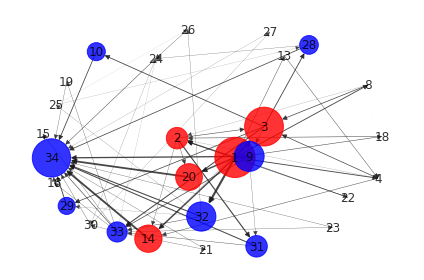

In [33]:
# different colors mark the cut set of the graph 
node_color = [] 
for v in G:
    if v-1 in V0:
        node_color.append('red')
    elif v-1 in V1:
        node_color.append('blue')

# size of node is proportional to the transition flux 
node_size = [200000 * T[v-1] for v in G] 

# width of edge is proportional to the effective flux 
edge_width = [500 * J_plus[u-1,v-1] for u, v in G.edges()] 

pos = nx.spring_layout(G)   
nx.draw_networkx(G,pos=pos, node_size = node_size,  
                 node_color = node_color, alpha = 0.8, 
                 with_labels = True, width = edge_width, 
                 edge_color ='.1') 
  
plt.axis('off') 
plt.tight_layout();

Now we focus on the key nodes according to the transition flux value $T$ and look at how information flows between two factions. 

In [34]:
G_cutset = nx.DiGraph() 
G_cutset.add_weighted_edges_from(edge_weights_cutset) 

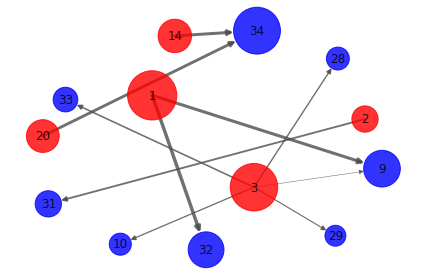

In [35]:

# different colors mark the cut set of the graph 
node_color_cutset = [] 
for v in G_cutset:
    if v-1 in V0:
        node_color_cutset.append('red')
    elif v-1 in V1:
        node_color_cutset.append('blue')

# size of node is proportional to the transition flux 
node_size_cutset = [300000 * T[v-1] for v in G_cutset] 

# width of edge is proportional to the effective flux 
edge_width_cutset = [800 * J_plus[u-1,v-1] for u, v in G_cutset.edges()] 

pos_cutset = nx.spring_layout(G_cutset)   
nx.draw_networkx(G_cutset, pos=pos_cutset, node_size = node_size_cutset,  
                 node_color = node_color_cutset, alpha = 0.8, 
                 with_labels = True, width = edge_width_cutset, 
                 edge_color ='.3') 
  
plt.axis('off') 
plt.tight_layout();

In the figure above, we can know the key members in two factions and the main transition path of imformation between two factions.

## References

1.Shi, J. and Malik, J. (2000). Normalized cuts and image segmentation. IEEE Transactions on Pattern
Analysis and Machine Intelligence, 22 (8), 888 – 905.<br>

2.Ng, A., Jordan, M., and Weiss, Y. (2002). On spectral clustering: analysis and an algorithm. In
T. Dietterich, S. Becker, and Z. Ghahramani (Eds.), Advances in Neural Information Processing
Systems 14 (pp. 849 – 856). MIT Press.

3.[Weinan E, Jianfeng Lu, and Yuan Yao. The Landscape of Complex Networks: Critical Nodes
and A Hierarchical Decomposition. Methods and Applications of Analysis](https://github.com/yao-lab/yao-lab.github.io/blob/master/reference/
ELY.MAA13.pdf)

4.An Information Flow Model for Conflict and Fission in Small Groups.

## Contributions

* Zhixian CHEN - Part A

* Yue WU - Part B